<a href="https://colab.research.google.com/github/RobSpiewakowski/nauka-data-science/blob/main/skrypty-colab/%C4%86wiczenia_Uczenie_maszynowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przygotowanie danych do modelowania

In [ ]:
# Import bibliotek:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.feature_selection import VarianceThreshold
from sklearn import compose
from sklearn import covariance
from sklearn import impute
from sklearn import model_selection
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model

In [ ]:
# Tworzymy zbiór danych:

dane = np.random.rand(20, 2)
dane

array([[0.64216755, 0.22609079],
       [0.40549074, 0.68282481],
       [0.19445468, 0.61535571],
       [0.46424475, 0.17121014],
       [0.47916523, 0.32050432],
       [0.54317939, 0.49035958],
       [0.08985288, 0.91776916],
       [0.99788083, 0.4273176 ],
       [0.24202698, 0.33335773],
       [0.88010236, 0.677399  ],
       [0.79443007, 0.46464465],
       [0.48781851, 0.85544234],
       [0.49420586, 0.50254734],
       [0.30336635, 0.37575062],
       [0.90305542, 0.554894  ],
       [0.09625251, 0.82330968],
       [0.27601363, 0.01704525],
       [0.43170109, 0.04863405],
       [0.60573114, 0.83146474],
       [0.41601234, 0.89297146]])

# Skalowanie zmiennych - skalowanie "min - max"

In [ ]:
print("Dane przed skalowaniem:\n", dane)

Dane przed skalowaniem:
 [[0.64216755 0.22609079]
 [0.40549074 0.68282481]
 [0.19445468 0.61535571]
 [0.46424475 0.17121014]
 [0.47916523 0.32050432]
 [0.54317939 0.49035958]
 [0.08985288 0.91776916]
 [0.99788083 0.4273176 ]
 [0.24202698 0.33335773]
 [0.88010236 0.677399  ]
 [0.79443007 0.46464465]
 [0.48781851 0.85544234]
 [0.49420586 0.50254734]
 [0.30336635 0.37575062]
 [0.90305542 0.554894  ]
 [0.09625251 0.82330968]
 [0.27601363 0.01704525]
 [0.43170109 0.04863405]
 [0.60573114 0.83146474]
 [0.41601234 0.89297146]]


In [ ]:
# Definiowanie zakresu skalowania danych:
# Przeskalujemy wszystkie wartości w zakresie 0 - 1:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Skalowanie właściwe:
skalowane_dane = scaler.fit_transform(dane)
print("Dane po skalowaniu:\n", skalowane_dane)

Dane po skalowaniu:
 [[0.60825735 0.23208614]
 [0.34760809 0.73916052]
 [0.11519667 0.66425511]
 [0.41231315 0.17115666]
 [0.4287449  0.33690576]
 [0.4992429  0.52548214]
 [0.         1.        ]
 [1.         0.4554918 ]
 [0.16758746 0.35117585]
 [0.87029202 0.7331367 ]
 [0.77594219 0.49693296]
 [0.43827465 0.93080364]
 [0.44530895 0.53901322]
 [0.23513976 0.39824121]
 [0.89556994 0.59712943]
 [0.00704783 0.89512938]
 [0.20501654 0.        ]
 [0.37647323 0.03507047]
 [0.56813037 0.90418327]
 [0.3591954  0.97246914]]


In [ ]:
# Sprawdźmy, jak wyglądają przeskalowane dane:
ff.create_distplot([skalowane_dane[:, 0]], ["Skalowanie"])

# Wszystkie wartości zostały przeskalowane (rozciągnięte lub ściśnięte) z zachowaniem proporcji do przedziału 0 - 1.

# Normalizacja zmiennych

In [ ]:
# Przeprowadzimy normalizację danych, w taki sposób aby suma elementów wynosiła 1:
# Zdefiniowanie normalizatora - norma Manhattan:
norm = preprocessing.Normalizer(norm = "l1")

# Normalizacja danych:
norm_dane = norm.transform(dane)
print(norm_dane)
print(norm_dane.sum(axis = 1))

# Dane zostały przekształcone w taki sposób, że ich suma w rzędach wynosi 1.

[[0.73960425 0.26039575]
 [0.37258564 0.62741436]
 [0.24012371 0.75987629]
 [0.73057074 0.26942926]
 [0.59920405 0.40079595]
 [0.52555289 0.47444711]
 [0.0891732  0.9108268 ]
 [0.70016975 0.29983025]
 [0.42063506 0.57936494]
 [0.56507325 0.43492675]
 [0.6309634  0.3690366 ]
 [0.36315993 0.63684007]
 [0.49581567 0.50418433]
 [0.44670707 0.55329293]
 [0.61940106 0.38059894]
 [0.1046721  0.8953279 ]
 [0.94183679 0.05816321]
 [0.89874975 0.10125025]
 [0.42146735 0.57853265]
 [0.31781321 0.68218679]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
ff.create_distplot([norm_dane[:, 0]], ["Normalizacja"])

# Standaryzacja danych

In [ ]:
# Standaryzacja to takie przeskalowanie danych, aby ich rozkład był mniej - więcej równy:
stand = preprocessing.StandardScaler()

# Standaryzacja:
stand_dane = stand.fit_transform(dane)
print(stand_dane)
print("średnia: ", stand_dane.mean(axis = 0).round())
print("Odchylenie standardowe: ", stand_dane.std(axis = 0))

# Jeśli nie masz powodów do stosowania jakiejś innej metody przygotowania danych do analizy, to stosuj standaryzację.

[[ 6.13358853e-01 -1.05961145e+00]
 [-3.24357537e-01  6.36390115e-01]
 [-1.16048500e+00  3.85855459e-01]
 [-9.15734659e-02 -1.26340109e+00]
 [-3.24583284e-02 -7.09023370e-01]
 [ 2.21166547e-01 -7.82957051e-02]
 [-1.57491858e+00  1.50881471e+00]
 [ 2.02269917e+00 -3.12391005e-01]
 [-9.72002951e-01 -6.61294488e-01]
 [ 1.55605944e+00  6.16242342e-01]
 [ 1.21662480e+00 -1.73783577e-01]
 [ 1.82608182e-03  1.27737501e+00]
 [ 2.71328092e-02 -3.30385755e-02]
 [-7.28975609e-01 -5.03875925e-01]
 [ 1.64699974e+00  1.61341540e-01]
 [-1.54956318e+00  1.15805603e+00]
 [-8.37347449e-01 -1.83586535e+00]
 [-2.20511824e-01 -1.71856585e+00]
 [ 4.68997332e-01  1.18833839e+00]
 [-2.82670845e-01  1.41673279e+00]]
średnia:  [0. 0.]
Odchylenie standardowe:  [1. 1.]


In [ ]:
ff.create_distplot([stand_dane[:, 0]], ["Standaryzacja"])

# Grupowanie zmiennych

In [ ]:
# Tworzymy zbiór danych:
dane2 = np.random.randint(16, 100, 20).reshape(10, 2)
klienci = pd.DataFrame(dane2, columns = ["Niebiescy", "Zieloni"])
klienci

,Niebiescy,Zieloni
0,78,98
1,66,19
2,68,71
3,68,68
4,65,41
5,36,34
6,52,52
7,54,34
8,95,66
9,97,72


In [ ]:
# Ustawienie wartości progowej:
# Wydzielimy sobie wszystkich klientów, gdzie wartość przekracza wartość progową:
prog = preprocessing.Binarizer(50)

# Zastosowanie progu:
prog.fit_transform(klienci)

array([[1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1]])

In [ ]:
# Zastosowanie kilku wartości progowych:
klienci_prog = np.digitize(klienci, bins = [18, 30, 65])
print("Dane przed zastosowaniem progów:\n", klienci)
print("Dane z progami:\n"), klienci_prog

Dane przed zastosowaniem progów:
    Niebiescy  Zieloni
0         78       98
1         66       19
2         68       71
3         68       68
4         65       41
5         36       34
6         52       52
7         54       34
8         95       66
9         97       72
Dane z progami:



(None, array([[3, 3],
        [3, 1],
        [3, 3],
        [3, 3],
        [3, 2],
        [2, 2],
        [2, 2],
        [2, 2],
        [3, 3],
        [3, 3]]))

# Podmianka wartości brakujących

In [ ]:
# Uzupełnianie braków danych z wykorzystaniem argumentu "strategy":
# strategy = "mean" -> zastępuje braki średnią
# strategy = "median" -> zastępuje braki medianą
# strategy -> "most_frequent" -> zastępuje braki dominantą

# Wczytujemy zbiór danych:
dane3 = pd.read_excel("/content/Elis - zestawienie sprzętu.xlsx")
dane3 = dane3[dane3["Rodzaj"] == "Pralka"]
dane3 = dane3[["l.p.", "Ładowność [kg]", "Moc znamionowa elektryczna [kW]"]]
dane3

,l.p.,Ładowność [kg],Moc znamionowa elektryczna [kW]
11,12,NaN,2.6
25,26,13.0,1.3
26,27,13.0,1.3
27,28,13.0,1.3
28,29,40.0,3.0
...,...,...,...
189,190,60.0,NaN
190,191,60.0,NaN
191,192,60.0,NaN
195,196,64.0,11.3


In [ ]:
# Jak widzisz, nie wszystkie dane są podane. Teraz spróbujemy uzupełnić je wartościami średnimi:
imputer = impute.SimpleImputer(strategy = "mean")
imputer.fit_transform(dane3)

array([[ 12.        ,  49.70918367,   2.6       ],
       [ 26.        ,  13.        ,   1.3       ],
       [ 27.        ,  13.        ,   1.3       ],
       [ 28.        ,  13.        ,   1.3       ],
       [ 29.        ,  40.        ,   3.        ],
       [ 30.        ,  40.        ,   3.        ],
       [ 31.        ,  40.        ,   3.        ],
       [ 32.        ,  42.        ,   4.2       ],
       [ 33.        ,  42.        ,   4.2       ],
       [ 34.        ,  42.        ,   4.2       ],
       [ 35.        ,  42.        ,   4.2       ],
       [ 36.        ,  42.        ,   4.2       ],
       [ 37.        ,  42.        ,   4.2       ],
       [ 38.        ,  42.        ,   4.2       ],
       [ 39.        ,  42.        ,   4.2       ],
       [ 40.        ,  11.        ,   9.7       ],
       [ 41.        ,  11.        ,   9.7       ],
       [ 42.        ,  11.        ,   9.7       ],
       [ 43.        ,  11.        ,   9.7       ],
       [ 44.        ,  49.70918

In [ ]:
# A teraz uzupełnimy braki medianami:
imputer = impute.SimpleImputer(strategy = "median")
imputer.fit_transform(dane3)

array([[ 12.  ,  42.  ,   2.6 ],
       [ 26.  ,  13.  ,   1.3 ],
       [ 27.  ,  13.  ,   1.3 ],
       [ 28.  ,  13.  ,   1.3 ],
       [ 29.  ,  40.  ,   3.  ],
       [ 30.  ,  40.  ,   3.  ],
       [ 31.  ,  40.  ,   3.  ],
       [ 32.  ,  42.  ,   4.2 ],
       [ 33.  ,  42.  ,   4.2 ],
       [ 34.  ,  42.  ,   4.2 ],
       [ 35.  ,  42.  ,   4.2 ],
       [ 36.  ,  42.  ,   4.2 ],
       [ 37.  ,  42.  ,   4.2 ],
       [ 38.  ,  42.  ,   4.2 ],
       [ 39.  ,  42.  ,   4.2 ],
       [ 40.  ,  11.  ,   9.7 ],
       [ 41.  ,  11.  ,   9.7 ],
       [ 42.  ,  11.  ,   9.7 ],
       [ 43.  ,  11.  ,   9.7 ],
       [ 44.  ,  42.  ,   5.5 ],
       [ 45.  ,  42.  ,  57.1 ],
       [ 46.  ,  64.  ,  15.7 ],
       [ 47.  ,  65.  ,  15.7 ],
       [ 49.  ,  36.  ,   7.1 ],
       [ 51.  ,  24.  ,   7.1 ],
       [ 52.  ,  42.  ,   0.87],
       [ 53.  ,  14.  ,   0.87],
       [ 54.  ,  63.  ,   7.1 ],
       [ 76.  ,  42.  ,  53.  ],
       [ 77.  ,  42.  ,  53.  ],
       [ 8

In [ ]:
# ...i dominantami:
imputer = impute.SimpleImputer(strategy = "most_frequent")
imputer.fit_transform(dane3)

array([[ 12.  ,  40.  ,   2.6 ],
       [ 26.  ,  13.  ,   1.3 ],
       [ 27.  ,  13.  ,   1.3 ],
       [ 28.  ,  13.  ,   1.3 ],
       [ 29.  ,  40.  ,   3.  ],
       [ 30.  ,  40.  ,   3.  ],
       [ 31.  ,  40.  ,   3.  ],
       [ 32.  ,  42.  ,   4.2 ],
       [ 33.  ,  42.  ,   4.2 ],
       [ 34.  ,  42.  ,   4.2 ],
       [ 35.  ,  42.  ,   4.2 ],
       [ 36.  ,  42.  ,   4.2 ],
       [ 37.  ,  42.  ,   4.2 ],
       [ 38.  ,  42.  ,   4.2 ],
       [ 39.  ,  42.  ,   4.2 ],
       [ 40.  ,  11.  ,   9.7 ],
       [ 41.  ,  11.  ,   9.7 ],
       [ 42.  ,  11.  ,   9.7 ],
       [ 43.  ,  11.  ,   9.7 ],
       [ 44.  ,  40.  ,   5.5 ],
       [ 45.  ,  40.  ,  57.1 ],
       [ 46.  ,  64.  ,  15.7 ],
       [ 47.  ,  65.  ,  15.7 ],
       [ 49.  ,  36.  ,   8.7 ],
       [ 51.  ,  24.  ,   8.7 ],
       [ 52.  ,  40.  ,   0.87],
       [ 53.  ,  14.  ,   0.87],
       [ 54.  ,  63.  ,   8.7 ],
       [ 76.  ,  40.  ,  53.  ],
       [ 77.  ,  40.  ,  53.  ],
       [ 8

# Kodowanie kategorii

In [ ]:
# Często dane występują nie tylko w formie liczb. Mamy do czynienia również z danymi jakościowymi.
# Wczytaj dane:
dane4 = pd.read_csv("https://bit.ly/33NOQXD")
dane4.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
# Sprawdźmy, ile mamy możliwych wartości zmiennej "Genre"
dane4["Genre"].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [ ]:
# LABEL ENCODER
# Tworzymy enkoder wg. kolejnoś i pojawienia się (tzn. każdej wartości przyporządkujemy zmienną liczbową):
label_encoder = preprocessing.LabelEncoder()

# Zastosowanie enkodera:
fit = label_encoder.fit(dane4["Genre"])
fit.transform(dane4["Genre"])

array([10,  4,  6, ...,  6,  5,  4])

In [ ]:
# LABEL BINARIZER
bin_encoder = preprocessing.LabelBinarizer()
bin_encoder.fit_transform(dane4["Genre"])

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Wylistowanie klas:
bin_encoder.classes_

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype='<U12')

In [ ]:
# ONE HOT ENCODER:
hot_encoder = preprocessing.OneHotEncoder()
hot_encoder.fit_transform(dane4["Genre"].values.reshape(-1, 1)).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Tworzenie inteligentnego encodera i przekształcenie w DataFrame:
hot_encoder2 = compose.ColumnTransformer(transformers = [("encoder", preprocessing.OneHotEncoder(categories = "auto"),
                                                          ["Genre"])], remainder = "drop")

transformed2 = hot_encoder2.fit_transform(dane4).toarray()
pd.DataFrame(transformed2, columns = ["Genre_" + str(a) for a in range (transformed2.shape[1])])

,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16595,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16596,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Zastosowanie funkcji GETDUMMIES:
# Również dość szybki sposób na kodowanie danych jakościowych
pd.get_dummies(dane4, columns = ["Genre"], prefix_sep = "_")

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1,Wii Sports,Wii,2006.0,Nintendo,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0
1,2,Super Mario Bros.,NES,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0
2,3,Mario Kart Wii,Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0
3,4,Wii Sports Resort,Wii,2009.0,Nintendo,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Kemco,0.01,0.00,0.00,0.00,0.01,0,0,0,0,1,0,0,0,0,0,0,0
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Infogrames,0.01,0.00,0.00,0.00,0.01,0,0,0,0,0,0,0,0,1,0,0,0
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Activision,0.00,0.00,0.00,0.00,0.01,0,0,0,0,0,0,1,0,0,0,0,0
16596,16599,Know How 2,DS,2010.0,7G//AMES,0.00,0.01,0.00,0.00,0.01,0,0,0,0,0,1,0,0,0,0,0,0


# Przetwarzanie daty i czasu

In [ ]:
# Import modułu:
from IPython.display import IFrame

In [ ]:
# Tworzenie zbioru:
data_text = np.array(["01-01-2021 10:25 AM",
                      "31-01-1992 6:05 AM",
                      "19-11-1998 12:01 PM",
                      "24-08-2018 03:30 PM",
                      "07-03-2020 09:05 AM"])

# Konwersja tekstu na datę i godzinę:
data = pd.to_datetime(data_text, format = "%d-%m-%Y %I:%M %p")
data

DatetimeIndex(['2021-01-01 10:25:00', '1992-01-31 06:05:00',
               '1998-11-19 12:01:00', '2018-08-24 15:30:00',
               '2020-03-07 09:05:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# Strefa czasowa:
# Warszawa:
data_Warsaw = data.tz_localize("Europe/Warsaw")
print(data_Warsaw)

print("----------------------------------")
# Konwersja na  czas w Tokio:
data_Warsaw.tz_convert("Asia/Tokyo")

DatetimeIndex(['2021-01-01 10:25:00+01:00', '1992-01-31 06:05:00+01:00',
               '1998-11-19 12:01:00+01:00', '2018-08-24 15:30:00+02:00',
               '2020-03-07 09:05:00+01:00'],
              dtype='datetime64[ns, Europe/Warsaw]', freq=None)
----------------------------------


DatetimeIndex(['2021-01-01 18:25:00+09:00', '1992-01-31 14:05:00+09:00',
               '1998-11-19 20:01:00+09:00', '2018-08-24 22:30:00+09:00',
               '2020-03-07 17:05:00+09:00'],
              dtype='datetime64[ns, Asia/Tokyo]', freq=None)

In [ ]:
# Zakresy dat:
# Wygenerowanie zakresu czasowego:
data_df = pd.DataFrame()
data_df["Data"] = pd.date_range("13/1/1992", periods = 260000, freq = "H")
data_df["Liczba"] = np.random.randn(260000)
data_df

,Data,Liczba
0,1992-01-13 00:00:00,0.165285
1,1992-01-13 01:00:00,-0.729237
2,1992-01-13 02:00:00,-0.314644
3,1992-01-13 03:00:00,-0.574485
4,1992-01-13 04:00:00,0.893146
...,...,...
259995,2021-09-10 03:00:00,-1.420742
259996,2021-09-10 04:00:00,0.567568
259997,2021-09-10 05:00:00,0.827691
259998,2021-09-10 06:00:00,0.587122


In [ ]:
# Filtrowanie zbioru wg zakresu dat:
data_df[(data_df["Data"] >= "2018-08-24 15:00:00") & (data_df["Data"] <= "2021-08-24 23:00:00")]

,Data,Liczba
233295,2018-08-24 15:00:00,0.827927
233296,2018-08-24 16:00:00,0.026781
233297,2018-08-24 17:00:00,-0.366341
233298,2018-08-24 18:00:00,1.565932
233299,2018-08-24 19:00:00,-0.192670
...,...,...
259603,2021-08-24 19:00:00,-0.173282
259604,2021-08-24 20:00:00,-0.131274
259605,2021-08-24 21:00:00,0.947871
259606,2021-08-24 22:00:00,0.399584


In [ ]:
# Tworzenie nowych zmiennych w ramach Time Stamp:
data_df_s = data_df["Data"].sample(10)
data_df_s

65253    1999-06-23 21:00:00
226016   2017-10-25 08:00:00
158647   2010-02-17 07:00:00
219888   2017-02-12 00:00:00
50617    1997-10-22 01:00:00
64849    1999-06-07 01:00:00
16530    1993-12-01 18:00:00
4360     1992-07-12 16:00:00
218646   2016-12-22 06:00:00
156938   2009-12-08 02:00:00
Name: Data, dtype: datetime64[ns]

In [ ]:
# Minuty:
data_df_s.dt.minute

65253     0
226016    0
158647    0
219888    0
50617     0
64849     0
16530     0
4360      0
218646    0
156938    0
Name: Data, dtype: int64

In [ ]:
# Godziny:
data_df_s.dt.hour

65253     21
226016     8
158647     7
219888     0
50617      1
64849      1
16530     18
4360      16
218646     6
156938     2
Name: Data, dtype: int64

In [ ]:
# Dni:
data_df_s.dt.day

65253     23
226016    25
158647    17
219888    12
50617     22
64849      7
16530      1
4360      12
218646    22
156938     8
Name: Data, dtype: int64

In [ ]:
# Miesiące:
data_df_s.dt.month

65253      6
226016    10
158647     2
219888     2
50617     10
64849      6
16530     12
4360       7
218646    12
156938    12
Name: Data, dtype: int64

In [ ]:
# Lata:
data_df_s.dt.year

65253     1999
226016    2017
158647    2010
219888    2017
50617     1997
64849     1999
16530     1993
4360      1992
218646    2016
156938    2009
Name: Data, dtype: int64

In [ ]:
# dni tygodnia:
data_df_s.dt.weekday

65253     2
226016    2
158647    2
219888    6
50617     2
64849     0
16530     2
4360      6
218646    3
156938    1
Name: Data, dtype: int64

In [ ]:
# Braki danych w datach:
data_df2 = pd.DataFrame()
data_df2["Data"] = pd.date_range("31/1/1992", periods = 100, freq = "d")
data_df2["Liczba"] = np.random.randint(1, 10, 100)

# Tworzenie próby danych:
data_na = data_df2.sample(10).reset_index()

# Usuwamy wartości:
data_na["Liczba"][1] = np.NaN
data_na["Liczba"][2] = np.NaN
data_na["Liczba"][3] = np.NaN
data_na

,index,Data,Liczba
0,67,1992-04-07,5.0
1,77,1992-04-17,NaN
2,36,1992-03-07,NaN
3,24,1992-02-24,NaN
4,70,1992-04-10,4.0
5,61,1992-04-01,1.0
6,71,1992-04-11,9.0
7,97,1992-05-07,8.0
8,28,1992-02-28,4.0
9,0,1992-01-31,4.0


In [ ]:
# Uzupełniamy braki - interpolacja liniowa:
# między dwiema najbliższymi znanymi wartościami otaczającymi braki kreślimy prostą. Wartości "wstawiane" są na tej prostej
data_na.interpolate()

,index,Data,Liczba
0,67,1992-04-07,5.00
1,77,1992-04-17,4.75
2,36,1992-03-07,4.50
3,24,1992-02-24,4.25
4,70,1992-04-10,4.00
5,61,1992-04-01,1.00
6,71,1992-04-11,9.00
7,97,1992-05-07,8.00
8,28,1992-02-28,4.00
9,0,1992-01-31,4.00


In [ ]:
# Uzupełniamy braki - wstecz:
# Uzupełniamy braki wartością znajdującą się za przedziałem z brakami
data_na.bfill()

,index,Data,Liczba
0,67,1992-04-07,5.0
1,77,1992-04-17,4.0
2,36,1992-03-07,4.0
3,24,1992-02-24,4.0
4,70,1992-04-10,4.0
5,61,1992-04-01,1.0
6,71,1992-04-11,9.0
7,97,1992-05-07,8.0
8,28,1992-02-28,4.0
9,0,1992-01-31,4.0


In [ ]:
# Uzupełniamy braki - wprzód:
# Uzupełniamy braki wartością znajdującą się przed przedziałem z brakami
data_na.ffill()

,index,Data,Liczba
0,67,1992-04-07,5.0
1,77,1992-04-17,5.0
2,36,1992-03-07,5.0
3,24,1992-02-24,5.0
4,70,1992-04-10,4.0
5,61,1992-04-01,1.0
6,71,1992-04-11,9.0
7,97,1992-05-07,8.0
8,28,1992-02-28,4.0
9,0,1992-01-31,4.0


In [ ]:
# Uzupełniamy braki - interpolacja liniowa z limitem wstecz:
# Ograniczamy liczbę interpolowanych wartości.
data_na.interpolate(limit = 2, limit_direction = "backward")

,index,Data,Liczba
0,67,1992-04-07,5.00
1,77,1992-04-17,NaN
2,36,1992-03-07,4.50
3,24,1992-02-24,4.25
4,70,1992-04-10,4.00
5,61,1992-04-01,1.00
6,71,1992-04-11,9.00
7,97,1992-05-07,8.00
8,28,1992-02-28,4.00
9,0,1992-01-31,4.00


# Identyfikacja wartości odstających

In [ ]:
# Tworzymy zbiór danych:
dane5 = np.random.randint(200, 400, 20)
zakupy = pd.DataFrame(dane5, columns = ["Sklep 1"])
print("Dane przed zastosowaniem progów:\n", zakupy)
print("--------------------------------------------")

# Tworzymy wartości odstające:
zakupy["Sklep 1"][0] = 60
zakupy["Sklep 1"][16] = 700
print(zakupy)

# Wykres
px.box(zakupy, y = "Sklep 1", points = "all")

Dane przed zastosowaniem progów:
     Sklep 1
0       320
1       323
2       321
3       381
4       260
5       260
6       369
7       384
8       340
9       327
10      314
11      232
12      222
13      223
14      359
15      208
16      299
17      298
18      242
19      225
--------------------------------------------
    Sklep 1
0        60
1       323
2       321
3       381
4       260
5       260
6       369
7       384
8       340
9       327
10      314
11      232
12      222
13      223
14      359
15      208
16      700
17      298
18      242
19      225


Metoda 1 - Elliptic Envelope:

---
Metoda dopasowuje wielowymiarowy rozkład Gaussa do zbioru danych. W praktyce tworzymy elipsę okalającą dane. Wartości odstające znajdują się poza elipsą. Podstawową wadą tej metody jest konieczność zdefiniowania procentu obserwacji, które mają być uznane za odstające. Robisz to w definicji detektora (contamination = 0,1).



In [ ]:
# Utworzenie detektowa wartości odstających na podstawie elipsy wokół danych:
detector = covariance.EllipticEnvelope(contamination = 0.1)

# Użycie detektora:
detector.fit(zakupy)

# Wykrycie wartości odstających:
# Pozycje zawierające wartości odstające oznaczono jako "-1" Jak widzisz, odstające są jedynie wartości największa i najmniejsza.
odstające = detector.predict(zakupy)
odstające

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1])

In [ ]:
px.scatter(zakupy, y = "Sklep 1", color = odstające)

Metoda 2 - IQR:

---
Rozstęp ćwiartkowy. W zbiorze wartości wyznacza kwartyle (tak, jak w wykresie pudełkowym) i na podstawie kryterium sprawdza, czy badana wartość mieści się w zadanych ograniczeniach (górnym i dolnym).


In [ ]:
# Tworzenie funkcji do identyfikacji anomalii:

def IQR_outliers(a):
  Q1, Q3 = np.percentile(a, [25, 75]) # Obliczenie wartości pierwszego i trzeciego kwartylu
  IQR = Q3 - Q1 # Obliczenie rozstępu ćwiartkowego

  górne_ograniczenie = Q3 + (1.5 * IQR) # Obliczenie górnej granicy dla wartości normalnych
  dolne_ograniczenie = Q1 - (1.5 * IQR) # Obliczenie dolnej granicy dla wartości normalnych
  print("Górne ograniczenie = ", górne_ograniczenie)
  print("Dolne ograniczenie = ", dolne_ograniczenie)

  indeksy = np.where((a > górne_ograniczenie) | (a < dolne_ograniczenie)) # Sprawdzenie warunku, czy badana wartość odstaje poza przyjęte granice
  b = np.full(shape = a.shape[0], fill_value = 1) # Jeśli nie spełnia warunku, to oznacz jako "1"
  b[indeksy] = -1 # Jeśli spełnia warunek, to oznacz jej indeks jako "-1"
  print(b) # Wyświetl macierz ze zidentyfikowanymi wartościami odstającymi

  return b

In [ ]:
# Użycie funkcji:
flaga_IQR = IQR_outliers(zakupy["Sklep 1"])

Górne ograniczenie =  516.5
Dolne ograniczenie =  58.5
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1]


In [ ]:
px.scatter(zakupy, y = "Sklep 1", color = flaga_IQR)

# Podział danych na zbiór uczący i testowy


---

Jeśli rozdzielamy zestaw danych na podzbiory uczący i testowy, to musimy się liczyć z utratą części informacji (często cennych). Dlatego nie należy umieszczać zbyt wielu informacji w zbiorze testowym. z drugiej jednak strony, im mniejszy jest zbiór testowy, tym mniejsza jest dokładność oszacowania błędu ogólnego. Tak więc, dzieląc dane na zbiory, musimy znaleźć "złoty środek" W praktyce, najczęściej wykorzystuje się proporcje podziału: 70 % danych uczących do 30 % danych testowych. Czasem 80 % do 20 %, albo 60 % do 40 %. Wszystko zależy od rozmiaru zestawu danych, na jakich działamy. Im większy zestaw danych, tym większy udział danych uczących. Po wyuczeniu modelu, zazwyczaj ponownie uczymy go tym razem wykorzystując już wszystkie dane, co pozwala nieco poprawić jego wydajność.

In [ ]:
# Wczytanie danych:
dane6 = pd.read_csv("https://bit.ly/33NOQXD", usecols = ["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"])
print(dane6.shape)
dane6.head(10)

(16598, 6)


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,41.49,29.02,3.77,8.46,82.74
1,Platform,29.08,3.58,6.81,0.77,40.24
2,Racing,15.85,12.88,3.79,3.31,35.82
3,Sports,15.75,11.01,3.28,2.96,33.00
4,Role-Playing,11.27,8.89,10.22,1.00,31.37
5,Puzzle,23.20,2.26,4.22,0.58,30.26
6,Platform,11.38,9.23,6.50,2.90,30.01
7,Misc,14.03,9.20,2.93,2.85,29.02
8,Platform,14.59,7.06,4.70,2.26,28.62
9,Shooter,26.93,0.63,0.28,0.47,28.31


In [ ]:
# Tworzenie zbiorów uczącego i testowego z wykorzystaniem funkcji "train_test_split":
X_train, X_test, y_train, y_test = model_selection.train_test_split(dane6.drop(columns = ["Genre"]), # Tu są dane do nauki
                                                                    dane6["Genre"], # To chcemy przewidywać w ramach uczenia modelu
                                                                    test_size = .3, # Jaki ma być udział zbiotu testowego
                                                                    random_state = 2020) # Ziarno losowości, żebyśmy przy każdym uruchomieniu skryptu otrzymali ten sam zbiór

In [ ]:
# Zestaw danych, w ramach których będziemy przewidywać "Genre":
# Zbiór danych uczący:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11618 entries, 10405 to 9056
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      11618 non-null  float64
 1   EU_Sales      11618 non-null  float64
 2   JP_Sales      11618 non-null  float64
 3   Other_Sales   11618 non-null  float64
 4   Global_Sales  11618 non-null  float64
dtypes: float64(5)
memory usage: 544.6 KB


In [ ]:
# Zbiór danych testowych:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 6636 to 10627
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      4980 non-null   float64
 1   EU_Sales      4980 non-null   float64
 2   JP_Sales      4980 non-null   float64
 3   Other_Sales   4980 non-null   float64
 4   Global_Sales  4980 non-null   float64
dtypes: float64(5)
memory usage: 233.4 KB


In [ ]:
print(y_train)

10405        Action
9350         Action
7851         Racing
13902        Sports
3199           Misc
            ...    
1661         Racing
11971        Sports
14966    Simulation
7491         Action
9056         Racing
Name: Genre, Length: 11618, dtype: object


In [ ]:
print(y_test)

6636         Sports
14473       Shooter
13860        Action
16023        Action
4293        Shooter
            ...    
2861     Simulation
10439      Platform
1828           Misc
6134         Action
10627       Shooter
Name: Genre, Length: 4980, dtype: object


# Redukcja wymiarów: przez wybór istotnych cech

Z danych wybieramy cechy istotne, tj. takie, że:


*   Nie są ze sobą silnie związane (jedna z nich nie jest zależna od innej)
*   Nie są silnie skorelowane (nie jest tak, że wszystkie obserwacje mają niemal taką samą wartość tej cechy)



In [ ]:
# Wczytywanie danych:
wino = pd.read_csv("https://bit.ly/2XYWtqG").drop(columns = ["Unnamed: 0"])
wino.head(10)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [ ]:
wino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         4898 non-null   float64
 1   volatile.acidity      4898 non-null   float64
 2   citric.acid           4898 non-null   float64
 3   residual.sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free.sulfur.dioxide   4898 non-null   float64
 6   total.sulfur.dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Wizualizacja zależności między kolumnami:
kolumny = pd.Index(wino.columns).tolist()
wykres = px.scatter_matrix(wino, dimensions = kolumny[:-1], color = "quality")
wykres.update_layout(autosize = False, width = 1600, height = 1600)
wykres.show()

Z tego zestawu wykresów można wyciągnąć te dane, które dają nam najwięcej przydatnych informacji. Szukamy kolejno jakiś zależności między kolejnymi parami zmiennych.

In [ ]:
# Lista cech objaśniających:
kolumny[:-1]

['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
# Tworzenie zbioru cech objaśniającycy i zmiennej objaśnianej:
X = wino[kolumny[:-1]]
Y = wino["quality"]

Zakładamy, że chcemy usunąć wartości o niskiej wariancji, czyli te, które najprawdopodobniej zawierają najmniej pożyczecznych informacji.

In [ ]:
# Ograniczenie względem wariancji, sprawdzamy:
np.var(X)

fixed.acidity              0.711968
volatile.acidity           0.010157
citric.acid                0.014643
residual.sugar            25.720518
chlorides                  0.000477
free.sulfur.dioxide      289.183667
total.sulfur.dioxide    1805.716751
density                    0.000009
pH                         0.022797
sulphates                  0.013022
alcohol                    1.514118
dtype: float64

In [ ]:
# Zdefiniowanie wartości progowej:
prog = VarianceThreshold(threshold = .1)

# Trenowanie funkcji:
funkcja = prog.fit(X)

# Tworzenie macierzy cech o wysokiej zmienności:
cechy_silnie_zmienne = funkcja.transform(X)

# Wyświetlenie macierzy:
cechy_silnie_zmienne

array([[  7. ,  20.7,  45. , 170. ,   8.8],
       [  6.3,   1.6,  14. , 132. ,   9.5],
       [  8.1,   6.9,  30. ,  97. ,  10.1],
       ...,
       [  6.5,   1.2,  30. , 111. ,   9.4],
       [  5.5,   1.1,  20. , 110. ,  12.8],
       [  6. ,   0.8,  22. ,  98. ,  11.8]])

In [ ]:
X.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


Wynik funkcji oznacza, że do analizy zostały nam jedynie pięć zmiennych objaśniających: fixed.acidity (7.0), residual.sugar (20.7), free.sulfur.dioxide (45), total.sulfur.dioxide (170), alcohol (8.8). Reszta została odfiltrowana ze względu na niespełnienie kryterium wielkości wariancji.

Problem silnej korelacji zmiennych. Zdarza się, że wśród cech, znajdują się dwie lub więcej cech, które są silnie od siebie zależne. Warto pousuwać te cechy tak, aby ostała się tylko jedna z nich.

In [ ]:
# Ograniczenie wymiarów względem korelacji zmiennych:
# Sprawdzenie korelacji zmiennych:
korelacja = X.corr().abs()
print(korelacja)

                      fixed.acidity  volatile.acidity  ...  sulphates   alcohol
fixed.acidity              1.000000          0.022697  ...   0.017143  0.120881
volatile.acidity           0.022697          1.000000  ...   0.035728  0.067718
citric.acid                0.289181          0.149472  ...   0.062331  0.075729
residual.sugar             0.089021          0.064286  ...   0.026664  0.450631
chlorides                  0.023086          0.070512  ...   0.016763  0.360189
free.sulfur.dioxide        0.049396          0.097012  ...   0.059217  0.250104
total.sulfur.dioxide       0.091070          0.089261  ...   0.134562  0.448892
density                    0.265331          0.027114  ...   0.074493  0.780138
pH                         0.425858          0.031915  ...   0.155951  0.121432
sulphates                  0.017143          0.035728  ...   1.000000  0.017433
alcohol                    0.120881          0.067718  ...   0.017433  1.000000

[11 rows x 11 columns]


In [ ]:
# Zdefiniowanie macierzy do filtrowania
# Macierz ta jest symetryczna względem jednej z przekątnych i dodatkowe zawiera korelację tych samych cech (alkohol i alkohol).
# Nie jest nam to do niczego potrzebne. My chcemy tylko raz sprawdzić korelację różnych zmiennych, dlatego odfiltrowujemy górny trójkąt:
macierz_filter = np.triu(np.ones(korelacja.shape), k = 1).astype(np.bool)
print(macierz_filter)
print("----------------------------------------------------------------------------------------------------------------------")

# Wykorzystanie macierzy filtrującej do macierzy korelacji:
góra = korelacja.where(macierz_filter)
print(góra)
print("----------------------------------------------------------------------------------------------------------------------")
# Wartość maksymalna:
góra.max()

[[False  True  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True  True]
 [False False False False False  True  True  True  True  True  True]
 [False False False False False False  True  True  True  True  True]
 [False False False False False False False  True  True  True  True]
 [False False False False False False False False  True  True  True]
 [False False False False False False False False False  True  True]
 [False False False False False False False False False False  True]
 [False False False False False False False False False False False]]
----------------------------------------------------------------------------------------------------------------------
                      fixed.acidity  volatile.acidity  ...  sulphates   alcohol
fixed.acidity                   NaN      

fixed.acidity                NaN
volatile.acidity        0.022697
citric.acid             0.289181
residual.sugar          0.094212
chlorides               0.114364
free.sulfur.dioxide     0.299098
total.sulfur.dioxide    0.615501
density                 0.838966
pH                      0.425858
sulphates               0.155951
alcohol                 0.780138
dtype: float64

In [ ]:
# Zdefiniowanie indeksów kolumn o korelacji powyżej 0.75:
index_mocna_korelacja = [kolumna for kolumna in góra.columns if any(góra[kolumna] > 0.75)]
print(index_mocna_korelacja)

['density', 'alcohol']


In [ ]:
# Usunięcie zidentyfikowanych kolumn o korelacji powyżej 0.75:
X = X.drop(columns = index_mocna_korelacja).head(10)
X

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,pH,sulphates
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,3.18,0.47
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,3.22,0.45


...i nie ma już w danych gęstości ani alkoholu. (gdyż wszystkie analizowane wina są niemal jednakowo gęste i mocne). Uważa się, że korelacja na poziomie powyżej 0,75 jest korelacją silną.

# Redukcja wymiarów: przez analizę głównych składowych


---

Redukcja wymiarów z zastosowaniem algorytmu PCA

In [ ]:
# Nasze dane:
print(X)
print("----------------------------------------------------------------------------------")
print(Y)

   fixed.acidity  volatile.acidity  ...    pH  sulphates
0            7.0              0.27  ...  3.00       0.45
1            6.3              0.30  ...  3.30       0.49
2            8.1              0.28  ...  3.26       0.44
3            7.2              0.23  ...  3.19       0.40
4            7.2              0.23  ...  3.19       0.40
5            8.1              0.28  ...  3.26       0.44
6            6.2              0.32  ...  3.18       0.47
7            7.0              0.27  ...  3.00       0.45
8            6.3              0.30  ...  3.30       0.49
9            8.1              0.22  ...  3.22       0.45

[10 rows x 9 columns]
----------------------------------------------------------------------------------
0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64


Będziemy redukować wymiary do takiej ich liczby, która pozwoli zachować wystarczającą wartość wariancji.

In [ ]:
# Tworzenie kompresowa:
kompresor_PCA = decomposition.PCA(n_components = 0.9) # Zachowujemy 90 % wariancji

# Wyuczenie kompresora:
fit_PCA = kompresor_PCA.fit(X)

# Użycie kompresora:
X_Var = fit_PCA.transform(X)
print(X_Var)

# Okazało się, że za pomocą PCA jesteśmy w stanie zredukować 12 wymiarów (zmiennych objaśniających) do jednej cechy.

[[-30.0210259 ]
 [ 17.01541447]
 [ 45.36252421]
 [-44.43429886]
 [-44.43429886]
 [ 45.36252421]
 [  8.1394999 ]
 [-30.0210259 ]
 [ 17.01541447]
 [ 16.01527225]]


In [ ]:
# Redukcja zbioru do dwóch wymiarów:
# Tworzenie kompresora:
kompresor_PCA = decomposition.PCA(n_components = 2)

# Wyuczenie kompresora:
fit_PCA = kompresor_PCA.fit(X)

# Użycie kompresora:
X_2D = fit_PCA.transform(X)
print(X_2D)
print("--------------------------------------------------------")

# Tworzymy zbiór danych do wykresu:
X_2D_df = pd.DataFrame(X_2D, columns = ["x1", "x2"])
X_2D_df["Ocena"] = Y

# Wykres:
wykres = px.scatter(X_2D_df, x = "x1", y = "x2", color = "Ocena", log_x = True)
wykres.show()

[[-30.0210259   -7.80588932]
 [ 17.01541447  15.59204799]
 [ 45.36252421 -10.70524775]
 [-44.43429886   0.94306434]
 [-44.43429886   0.94306434]
 [ 45.36252421 -10.70524775]
 [  8.1394999    0.95763961]
 [-30.0210259   -7.80588932]
 [ 17.01541447  15.59204799]
 [ 16.01527225   2.99440986]]
--------------------------------------------------------


Jądrowa analiza PCA (Kernel PCA). Można wybrać dowolny kernel z listy:

*   Liniowy - jądro liniowe
*   poly - jądro wielowymiarowe
*   rbf - jądro radialnej funkcji bazowej
*   cosine - jądro kosinusowe

In [ ]:
# Redukcja zbioru do dwóch wymiarów:
# Tworzenie kompresora:
kompresor_PCA_kernel = decomposition.KernelPCA(n_components = 2, kernel = "rbf")

# Wyuczenie kompresora:
fit_PCA_Kernel = kompresor_PCA_kernel.fit(X)

# Użycie kompresora:
X_2D_kernel = fit_PCA_Kernel.transform(X)
print(X_2D_kernel)
print("-----------------------------------------------------------")

# Dane do wykresu:
X_2D_Kernel_df = pd.DataFrame(X_2D_kernel, columns = ["x1", "x2"])
X_2D_Kernel_df["Ocena"] = Y

# Wykres:
wykres2 = px.scatter(X_2D_Kernel_df, x = "x1", y = "x2", color = "Ocena", log_x = True)
wykres2.show()

[[ 4.85003315e-02  7.36722495e-01]
 [-1.36129851e-01  1.82934638e-01]
 [ 7.42125906e-01 -4.38730424e-01]
 [-6.54496387e-01 -4.80926709e-01]
 [-6.54496387e-01 -4.80926709e-01]
 [ 7.42125906e-01 -4.38730424e-01]
 [-1.76263549e-15  3.08332952e-15]
 [ 4.85003315e-02  7.36722495e-01]
 [-1.36129851e-01  1.82934638e-01]
 [-2.42552630e-11  3.25944247e-11]]
-----------------------------------------------------------


# Ocena modelu

In [ ]:
# Wczytywanie danych:
wino = pd.read_csv("https://bit.ly/2XYWtqG").drop(columns = ["Unnamed: 0"])
wino.head(10)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [ ]:
wino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         4898 non-null   float64
 1   volatile.acidity      4898 non-null   float64
 2   citric.acid           4898 non-null   float64
 3   residual.sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free.sulfur.dioxide   4898 non-null   float64
 6   total.sulfur.dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Wizualizacja zależności między kolumnami:
kolumny = pd.Index(wino.columns).tolist()
wykres = px.scatter_matrix(wino, dimensions = kolumny[:-1], color = "quality")
wykres.update_layout(autosize = False, width = 1600, height = 1600)
wykres.show()

In [ ]:
# Lista cech objaśniających:
kolumny[:-1]

['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
# Tworzenie zbioru cech objaśniających i zmiennej objaśnianej:
x = wino[kolumny[:-1]]
y = wino["quality"]

# Krzyżowa walidacja modelu:
Inaczej k-krotne sprawdzenie krzyżowe. W tej metodzie, dzielimy zbiór danych na k części (k podzbiorów). Model jest trenowany za pomocą k - 1 (o jeden mniej od k) podzbiorów. Ostatni (k-ty) podzbiór jest wtykorzystany jako zbiór testowy. Powtarzamy cały zabieg k razy.

In [ ]:
# Tworzenie zestawów dacych:
x_krzyz = x.values
y_krzyz = y.values

print("x: ", x_krzyz, sep = "\n")
print("y: ", y_krzyz, sep = "\n")

x: 
[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]
y: 
[6 6 6 ... 6 7 6]


In [ ]:
# Standaryzacja danych:

# Utworzenie metody standaryzacji danych:
stand = preprocessing.StandardScaler()

# Wybór metody modelowania:
algo = linear_model.LogisticRegression()

# Utworzenie procesu standaryzacji i wykorzystania algorytmu regresji logistycznej:
proces = pipeline.make_pipeline(stand, algo)

# Zdefiniowanie metody oceny modelu - shuffle (tasowanie danych przed wyborem):
walidacja = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 2020)
# n_splits - ile wygenerować podzbiorów (ile powtórzeń)
# shuffle - tasowanie
# random_state - ziarno losowości (przy ponownym uruchomieniu tego skryptu uzyskamy takie same wyniki)

In [ ]:
# Przeprowadzenie krzyżowej walidacji modelu:
walidacja_wynik = model_selection.cross_val_score(proces, # proces standaryzacji danych
                                                  x_krzyz, # zbiór zmiennych objasniających
                                                  y_krzyz, # zdefiniowanie zmiennej objaśnianej
                                                  cv = walidacja, # metoda oceny
                                                  scoring = "accuracy", # metoda analizy wydajności modelu
                                                  n_jobs = -1) # Jakie zasoby komputera chcemy wykorzystać do analizy

In [ ]:
# Średnia dokładność ocenianego modelu:
walidacja_wynik.mean()

0.5359279564737028

Tak, dla porównania - prosty model regrasji logistycznej:

In [ ]:
# Tworzenie zbiorów: uczący / testowy:
x_uczący, x_testowy, y_uczący, y_testowy = model_selection.train_test_split(x, y, test_size = .3, random_state = 2020)

# Standaryzacja:
stand = preprocessing.StandardScaler()
fit_stand = stand.fit(x_uczący)
x_uczący_stand = fit_stand.transform(x_uczący)
x_testowy_stand = fit_stand.transform(x_testowy)

# Wybieranie algorytmu:
algo = linear_model.LogisticRegression(n_jobs = -1)

# Uczenie modelu:
algo.fit(x_uczący_stand, y_uczący)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predykcja na wyuczonym modelu:
predykcja = algo.predict(x_testowy_stand)
predykcja

array([7, 6, 7, ..., 6, 6, 5])

In [ ]:
# Wyznaczenie dokładności modelu:
algo.score(x_testowy_stand, y_testowy)

0.5578231292517006

In [ ]:
# więcej metryk:
print(metrics.classification_report(y_testowy, predykcja))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.06      0.11        48
           5       0.60      0.53      0.57       435
           6       0.55      0.75      0.63       681
           7       0.53      0.29      0.37       252
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1470
   macro avg       0.31      0.23      0.24      1470
weighted avg       0.54      0.56      0.53      1470



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion matrix

In [ ]:
# Macierz błędów:
metrics.confusion_matrix(y_testowy, predykcja, labels = np.unique(y_testowy))

array([[  0,   0,   1,   2,   1,   1,   0],
       [  0,   3,  24,  21,   0,   0,   0],
       [  0,   1, 232, 199,   2,   1,   0],
       [  0,   2, 116, 512,  50,   0,   1],
       [  0,   0,  10, 169,  73,   0,   0],
       [  0,   0,   3,  34,  11,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

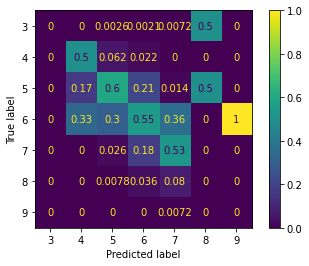

In [ ]:
metrics.plot_confusion_matrix(algo, x_testowy_stand, y_testowy, normalize = "pred")
plt.show()

# Klasyfikator binarny

In [ ]:
print(x)
print(y)

      fixed.acidity  volatile.acidity  citric.acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               6.3              0.30         0.34  ...  3.30       0.49      9.5
2               8.1              0.28         0.40  ...  3.26       0.44     10.1
3               7.2              0.23         0.32  ...  3.19       0.40      9.9
4               7.2              0.23         0.32  ...  3.19       0.40      9.9
...             ...               ...          ...  ...   ...        ...      ...
4893            6.2              0.21         0.29  ...  3.27       0.50     11.2
4894            6.6              0.32         0.36  ...  3.15       0.46      9.6
4895            6.5              0.24         0.19  ...  2.99       0.46      9.4
4896            5.5              0.29         0.30  ...  3.34       0.38     12.8
4897            6.0              0.21         0.38  ...  3.26       0.32     11.8

[4898 rows x 11

In [ ]:
np.unique(y.values)

array([3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Trzeba zredukować liczbę klas:
# Tworzenie zbioru z dwoma klasami:
prog = preprocessing.Binarizer(5)
y_2klasy = prog.fit_transform(y.values.reshape(-1, 1))
print(y_2klasy)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [ ]:
# Utworzenie modelu standaryzacji danych:
standaryzacja = preprocessing.StandardScaler()

# Wybranie metody modelowania:
algo = linear_model.LogisticRegression()

# Utworzenie procesu standaryzacji i wykorzystania algorytmu regresji liniowej:
proces = pipeline.make_pipeline(standaryzacja, algo)

# Ustawienie walidacji krzyżowej:
walidacja = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 2020)

# Tworzenie modelu ze sprawdzeniem krzyżowym dokładności:
model_selection.cross_val_score(proces,
                                x,
                                y_2klasy,
                                cv = walidacja,
                                scoring = "accuracy",
                                n_jobs = -1).mean()

0.7486699219565127

In [ ]:
# Pewność
# Tworzenie modelu ze sprawdzeniem krzyżowym pewności:
model_selection.cross_val_score(proces,
                                x,
                                y_2klasy,
                                cv = walidacja,
                                scoring = "recall",
                                n_jobs = -1).mean()

0.878249142402898

In [ ]:
# Precyzja
# Tworzenie modelu ze sprawdzeniem krzyżowym precyzji:
model_selection.cross_val_score(proces,
                                x,
                                y_2klasy,
                                cv = walidacja,
                                scoring = "precision",
                                n_jobs = -1).mean()

0.7740059789320578

In [ ]:
# Wskaźnik f1
# Tworzenie modelu ze sprawdzeniem krzyżowym wskaźnika F1:
model_selection.cross_val_score(proces,
                                x,
                                y_2klasy,
                                cv = walidacja,
                                scoring = "f1",
                                n_jobs = -1).mean()

0.8228159036951505

# Krzywa ROC

In [ ]:
# Tworzenie zbiorów uczący / testowy:
x_uczący, x_testowy, y_uczący, y_testowy = model_selection.train_test_split(x, y_2klasy,
                                                                            test_size = .3,
                                                                            random_state = 2020)

# Standaryzacja:
standaryzacja = preprocessing.StandardScaler()
fit_stand = standaryzacja.fit(x_uczący)
x_uczący_stand = fit_stand.transform(x_uczący)
x_testowy_stand = fit_stand.transform(x_testowy)

# Wybranie algorytmu:
algo = linear_model.LogisticRegression(n_jobs = -1)

# Wyuczenie modelu:
algo.fit(x_uczący_stand, y_uczący)

# Pobranie prawdopodobieństwa z predykcji:
pred_prawd = algo.predict_log_proba(x_testowy)[:-1]
print(pred_prawd)

[[-1.20251944e+01 -5.99136429e-06]
 [-9.58725028e+00 -6.86001400e-05]
 [-1.37041259e+01 -1.11782538e-06]
 ...
 [-1.15122315e+01 -1.00069922e-05]
 [-1.03829646e+01 -3.09558314e-05]
 [-1.32919473e+01 -1.68803333e-06]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# Wyliczenie metryk TPR(true positive rate) i FPR(false positive rate):
FP_value, TP_value, prog_prawd = metrics.roc_curve(y_testowy, pred_prawd)

ValueError: ignored

In [ ]:
# Powierzchnia pod krzywą ROC:
ROC_score = metrics.roc_auc_score(y_testowy, pred_prawd)

ValueError: ignored

Klasyfikator wieloklasowy

In [ ]:
print(x)
print(y)

      fixed.acidity  volatile.acidity  citric.acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               6.3              0.30         0.34  ...  3.30       0.49      9.5
2               8.1              0.28         0.40  ...  3.26       0.44     10.1
3               7.2              0.23         0.32  ...  3.19       0.40      9.9
4               7.2              0.23         0.32  ...  3.19       0.40      9.9
...             ...               ...          ...  ...   ...        ...      ...
4893            6.2              0.21         0.29  ...  3.27       0.50     11.2
4894            6.6              0.32         0.36  ...  3.15       0.46      9.6
4895            6.5              0.24         0.19  ...  2.99       0.46      9.4
4896            5.5              0.29         0.30  ...  3.34       0.38     12.8
4897            6.0              0.21         0.38  ...  3.26       0.32     11.8

[4898 rows x 11

In [ ]:
np.unique(y.values)

array([3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Tworzenie zbioru z 2 klasami:
y_3klasy = np.digitize(y, bins = [5, 7])
print("unikalne klasy: ", np.unique(y_3klasy), sep = "\n")

unikalne klasy: 
[0 1 2]


In [ ]:
# Wybranie metody modelowania:
algo = linear_model.LogisticRegression()

# Tworzenie modelu ze sprawdzeniem krzyżowym dokładności:
model_selection.cross_val_score(algo,
                                x,
                                y_3klasy,
                                scoring = "accuracy",
                                n_jobs = -1).mean()

0.758473035792458

In [ ]:
# Wskaźnik F1 macro (średnia ocen z poszczególnych ocen)
# Wybranie metody modelowania:
algo = linear_model.LogisticRegression()

# Tworzenie modelu ze sprawdzeniem krzyżowym dokładności:
model_selection.cross_val_score(algo,
                                x,
                                y_3klasy,
                                scoring = "f1_macro",
                                n_jobs = -1).mean()

0.373163676462741

In [ ]:
# Wskaźnik F1 micro (średnia ocen z poszczególnych ocen)
# Wybranie metody modelowania:
algo = linear_model.LogisticRegression()

# Tworzenie modelu ze sprawdzeniem krzyżowym dokładności:
model_selection.cross_val_score(algo,
                                x,
                                y_3klasy,
                                scoring = "f1_micro",
                                n_jobs = -1).mean()

0.758473035792458

In [ ]:
# F1 weighted (średnia ważona)
# Wybranie metody modelowania:
algo = linear_model.LogisticRegression()

# Tworzenie modelu ze sprawdzeniem krzyżowym dokładności:
model_selection.cross_val_score(algo,
                                x,
                                y_3klasy,
                                scoring = "f1_weighted",
                                n_jobs = -1).mean()

0.6954800753038869

# Ocena modelu - modele regresji:
Do przewidywania wartości zmiennych objaśnianych

In [ ]:
print(x)
print(y)

      fixed.acidity  volatile.acidity  citric.acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               6.3              0.30         0.34  ...  3.30       0.49      9.5
2               8.1              0.28         0.40  ...  3.26       0.44     10.1
3               7.2              0.23         0.32  ...  3.19       0.40      9.9
4               7.2              0.23         0.32  ...  3.19       0.40      9.9
...             ...               ...          ...  ...   ...        ...      ...
4893            6.2              0.21         0.29  ...  3.27       0.50     11.2
4894            6.6              0.32         0.36  ...  3.15       0.46      9.6
4895            6.5              0.24         0.19  ...  2.99       0.46      9.4
4896            5.5              0.29         0.30  ...  3.34       0.38     12.8
4897            6.0              0.21         0.38  ...  3.26       0.32     11.8

[4898 rows x 11

In [ ]:
# Tworzenie zestawów danych:
x_reg = x.drop(columns = ["alcohol"]).values
y_reg = x["alcohol"].values

Błąd średniokwadratowy

In [ ]:
# Wybranie metody modelowania:
algo_reg = linear_model.LinearRegression()

# Tworzenie modelu ze sprawdzeniem krzyżowym negatywnego błędu średniokwadratowego - MSE:
model_selection.cross_val_score(algo_reg,
                                x_reg,
                                y_reg,
                                scoring = "neg_mean_squared_error",
                                n_jobs = -1)

# Im wyższa wartość bezwzględna błędu średniokwadratowego - tym gorszy model

array([-0.16515614, -0.21623078, -0.45441593, -0.14559464, -0.12467421])

R^2 - współczynnik determinacji

In [ ]:
# Tworzenie modelu ze sprawdzeniem krzyżowym współczynnika R^2:
model_selection.cross_val_score(algo_reg,
                                x_reg,
                                y_reg,
                                scoring = "r2",
                                n_jobs = -1).mean()

# Wartość współczynnika powyżej 0.8 oznacza prawidłowy model. Można śmiało przewidywać :-)

0.8341620235831044

# Wprowadzenie do sieci neuronowych - podstawy działania sieci i budowa.

Sieci neuronowe wynikają z prób modelowania ludzkiego mózgu. Ale dziś już nikt nie zawraca sobie głowy mózgami. Wszystkie sieci neuronowe współdzielą ze sobą elementy:

1.   Węzły - odpowiadają neuroną - połączenia.
2.   Warstwy - złożone z wielu węzłów zestawy, odpowiadające jakiemuś obszarowi funkcjonalnemu (tak, jak obszary funkcjonalne w mózgu.
3.   Wagi - łączą wyjścia z poprzedniej warstwy z neuronami w obecnej warstwie - jak silnie przepływa sygnał między warstwami.
4.   Aktywacje - funkcje, które definiują sposób pobudzania neuronów (tego nie ma w ludzkim mózgu)
5.   Bias - "sztuczne wejście", które ma skalowaźć pobudzenie sieci. Stosowane, gdy wszystkie wejścia do sieci są "zerami" ale my jednak chcemy ją aktywować.


Najpowszechniejsze wyjścia z sieci neuronowej:


1.   pojedyncza liczba rzeczywista - regresja;
2.   Pojedyncza liczba w zakresie [0, 1] - klasyfikacja binarna, prawdopodobieństwo;
3.   Kilka liczb w zakresie [0, 1] - klasyfikacja wieloklasowa, zazwyczaj wszystkie liczby sumują się do 1;
4.   Wektor z liczbami rzeczywistymi - przewidywanie wektorów i sekwencji.



Opis pojedynczego neuronu - perceptronu:

1. INPUT - jakieś wejście do neuronu (zawieras jakąś informację) - może być ich wiele
2. BIAS - na wypadek, gdyby wszystkie wejścia były zerowe
3. Hlj - Suma ważona wszystkich wejść do neuronu (wagami są... wagi)
4. FUNKCJA AKTYWACJI - od jej wyboru zależy powodzenie pracy neuronu
5. OUTPUT - jest wynikiem funkcji aktywacji z wejściem w roli argumentu.

Czym są funkcje aktywacji:

1. Funkcje aktywacji determinują rodzaj wyjścia z sieci;
2. Wprowadzają nieliniwowść i pozwalają na mapowanie wektorów na różne dziedziny wartości (DZIĘKI TEMU SIECI NEURONOWE MOGĄ MODELOWAĆ WSZYSTKO!);
3. Ich wybór zależy od konkretnego celu, w jakim buduje się sieć (albo warstwę);
4. Każda z nich ma swoją specyfikę, pochodną i określone własności, które należy znać, podczas projektowania i wyboru architektury sieci;
5. Najprościej, jak się da: Służą skalowaniu wyników z określonego neuronu.

Rodzaje funkcji aktywacji:

1. Aktywacja liniowa (czyli po prostu funkcja liniowa) - raczej niespotykana, gdyż nie jest to de-facto żadna aktywacja: y = ax + b.
Brak nieliniowości;
2. Funkcja SIGMOID - funkcja skalująca wejścia w przedziale [0, 1]. Świetna do smodelowania prawdopodobieństwa, używana w klasyfikacji binarnej: y = 1/(1 + exp(-x)). Funkcja podatna jest na spowolnienie uczenia przy krańcach zakresu wartości, ze względu na nasycenie gradientu (spadek nachylenia). Fajna pochodna: df/dx = f(x)*(1 - f(x))
3. Tangens hiperboliczny - funkcja skalująca wyniki w przedziale [-1, 1]: y = (exp(x) - exp(-x)) / (exp(x) + exp(-x)). Również wygodna postać pochodnej: df/dx = (1 - f(x))^2.
4. ReLU (Rectified Linear Unit) - najczęściej funkcja aktywacyjna w wewnętrznych warstwach sieci neuronowych. Postać: y = 0 dla x < 0 ^ y = x dla x >= 0. Funkcja ReLU jest bardzo podatna na porblem "martwych neuronów" (jeśli pochodna osiągnie 0, to neuron KAPUT. A to powoduje dezaktywację części sieci).
5. Leaky ReLU - niewielka modyfikacja funkcji ReLU, która nie przyjmuje wartości 0 dla argumentów ujemnych. Postać: y = ax dla x <= 0 ^ y = x dla x > 0. Chodzi o to, że Leaky ReLU przyjmuje bardzo małe (tyci-tyci) wartości ujemne dla ujemnych argumentów (grunt, że nie zera). Ten trick eliminuje problem zabijania neuronów, ale bardzo dużo zależy od dobranej wartości stałej a.
6. Funkcja SOFTMAX - funkcja używana przy klasyfikacji wieloklasowej, w ostatniej warstwie sieci. Skaluje wartości wyjścia poszczególnych neuronów, tak aby sumowały się do jedynki. W ten sposób modeluje się prawdopodobieństwo. Postać: y = exp(xi) / SUM(j = 1, n exp(xj))

# Wprowadzenie do sieci neuronowych - schemat szkolenia sieci neuronowej: 

Fazy szkoleia sieci neuronowej:

1. Pierwsza faza, czyli forward pass - przejście wszystkich danych przez sieć i aktywacja w przód;
1. W praktyce, trenowanie sieci neuronowych odbywa się z wykorzystaniem wielu obserwacji;
2. Tabela z danymi składa się z obserwacji (rekordów) - w wierszach opisanych cechami - w kolumnach.
3. "Epoka" to każde przejście wszystkich punktów danych przez sieć.
4. Normalizacja cech - BAAARDZO WAŻNE JEST ABY PRZYGOTOWUJĄC DANE znormalizować cechy. Wszystkie cechy powinny być wyrażone w tej samej jednostce (najlepiej w przedziale [0, 1]). Normalizacja zapobiega problemowi nasycenia.

In [ ]:
import math

# Przykład:
pokoje = 3
odległość_centrum = 2
metraż = 0.75 # w setkach metrów kwadratowych - efekt normalizacji.

# Waga dla liczby pokoi:
w1 = 0.5
# waga dla odległości od centrum:
w2 = 0.2
# Waga dla metrażu:
w3 = 0.8

# Obliczamy wartość Hlj:
Hlj = pokoje * w1 + odległość_centrum * w2 + metraż * w3
print(Hlj)

# Wykorzystamy funkcję SIGMOID aby zarekomendować zakup (im bliżej 1 tym bardziej napaleni na kupowanie):
sig = y = 1/(1 + math.exp(- Hlj))
print("SIG = ", sig, ", Czyli BIER!!!")

2.5
SIG =  0.9241418199787566 Czyli BIER!!!


Schemat szkolenia sieci - dalej:

1. Predykcje sieci - czyli co wstępnie wypluła sieć - są wektorem wyników o fługości takiej samej jak liczba wierszy danych;
2. Porówniywanie predykcji z wartościami oczekiwanymi - jest podstawą do liczenia wielkości błędu popełnionego przez sieć (funkcja błędu)
3. Wsteczna propagacja - matematyczne narzędzie, za pomocą kórego uczy się sieć - reguła łańcuchowa liczenia pochodnych. Czyli, jak możemy zaktualizować wagi aby wynik był jak najbardziej zbliżony do wartości oczekiwanej.
4. Intuicyjna interpretacja - wpływ poszczególnych wag na wielkość błędu

# Wprowadzenie do sieci neuronowych - wskazówki do wyboru architektury sieci:

UWAGA! Nie ma jednej dobrej architektury sieci do jakiegoś problemu!

Multilayer Perceptron (MLP), zwana też Feed Forward Neural Network (FFNN): Taki standard...

1. Zwyczajna architektura do rozwiązywania problemów klasyfikacji i regresji;
2. Wymaga odpowiedniego doboru ilości warstw ukrytych i ilości neuronów w każdej z nich;
3. Co do zasady - oparta na opisanym aparacie matematycznym, bez dodatkowych modyfikacji.

Convolutional Neural Network (CNN):

1. Rodzja sieci do przetwarzania obrazów albo danych dwu lub trójwymiarowych o uporządkowanej strukturze;
2. Oparta na dwóch zasadach: Matematyczny operator konwolucji ("przesuwanie" okienka z funkcją nad uporządkowanymi danymi) oraz współdzielenie wag w każdej warstwie konwolucyjnej;
3. Standard w przetwarzaniu obrazów, bardzo często prowadzi do powstania sieci o bardzo skomplikowanej strukturze.

Recurrent Neural Network (RNN):
Sieć, która potrafi przyjąć swoje własne wyjście, jako wejście.

1. Ogólna architektura do modelowania procesów, w których sieć musi polegać na swoich własnych, wcześniejszych predykcjach;
2. Obecnie w podstawowej wersji, raczej rzadko spotykana, ze względu na problem szybkiego zapominania i znikających gradientów;
3. Koncepcja, dzięki której opracowano taką architekturę, pozwoliła w późniejszym czasie stworzyć sieci LSTM, GRU oraz m.in. sieci wykorzystujące mechanizm atencji

Long-short Term Memory Neural Network (LSTM)

1. Rodzaj sieci rekurencyjnej, do niedawna standardowej do przetwarzania danych o charakterze tymczasowym;
2. Wykorzystuje mechanizma rekurencyjnego przekazywania informacji do zapamiętywania wzorców sekwencji w dwóch zakresach: pamięci długotrwałej - dla zjawisk oddalonych w czasie oraz pamięci krótkotrwałej - dla zjawisk poprzedzających katualnie przetwarzane;
3. Do niedawna była standardem w zakresie prognozowanych szeregów czasowych oraz analizy języka naturalnego.

Ogólne reguły:

1. Im głębsza jest sieć, tym bardziej zaawansowanych własności danych potrafi się nauczyć;
2. Szkolenie jest trudniejsze i trwa dłużej, im bardziej rozbudowaną mamy sieć; Potrzeba także więcej danych;
3. Gotowe rozwiązania istnieją dla określonych klas problemów;
4. Dobór hiperparamterów takich, jak współczynnik uczenia się, regularyzacja, liczba epok...

# Wprowadzenie do sieci neuronowych - praktyczne zadania

Przykład 1 - klasyfikacja kwiatów irysa. W ramach ćwiczonka, nauczymy komputer rozpoznawać poszczególne gatunki irysa na podstawie ich wymiarów:

1. Za pomocą pakietu scikit-learn załadujemy dane ze zbioru IRIS,
2. Przekonwertujemy je do postaci Data Frame, aby móc je przeglądać,
3. Przeprowadzimy podział na zbiór testowy i uczący,
4. Zamienimy wektor wartości oczekiwanych "Y" na format one-hot encoding, żeby zrozumieć zasadę działania funkcji SOFTMAX,
5. Przeprowadzimy normalizację.

In [ ]:
# import bibliotek:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, f1_score, roc_auc_score, mean_absolute_error
from sklearn.datasets import load_boston, load_iris
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
from sklearn.utils import shuffle

In [ ]:
# Przygotowanie danych:
iris = load_iris()
iris_x = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_y = pd.Series(iris.target)
iris_x.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Analiza wstępna:
iris_x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Jakie mamy klasy kwiatów irysa?
iris_y.value_counts()

2    50
1    50
0    50
dtype: int64

In [ ]:
# Jakie mamy klasy kwiatów irysa? (Zbiór jest znormalizowany - tj. tak aby sumowały się do 1)
iris_y.value_counts(normalize = True)

2    0.333333
1    0.333333
0    0.333333
dtype: float64

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Dla celów dydaktycznych, zmieniamy zmienną zależną "Y" na postać one-hot encoding. Chcemy zobaczyć, jak działa np. funcja HOTMAX
# Zakodujemy sobie kategorie:
iris_y_ohe = tf.keras.utils.to_categorical(iris_y)
iris_y_ohe

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
# Dzielimy dane na zbiory: uczący i testowy:
iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(iris_x,
                                                                        iris_y_ohe,
                                                                        train_size = 0.8,
                                                                        random_state = 123)

In [ ]:
# Sprawdzamy wielkość zbiorów:
iris_x_train.shape, iris_y_train.shape

((120, 4), (120, 3))

In [ ]:
# Normalizacja danych:
# Skalowanie danych poprzez odjęcie od obserwacji średniej i podzielenie przez odchylenie standardowe:
scaler = StandardScaler()
iris_x_trains = scaler.fit_transform(iris_x_train)
iris_x_trains = pd.DataFrame(iris_x_trains, columns = iris_x_train.columns)
iris_x_trains.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.891072,-0.549030,1.323848,0.915465
1,0.161621,-1.916855,0.684916,0.373636
2,-1.444297,0.362854,-1.289966,-1.387307
3,-0.950168,1.046766,-1.406135,-1.387307
4,0.161621,-1.916855,0.104069,-0.303650


In [ ]:
# Porównajmy znormalizowane dane z oryginalnymi:
print(iris_x_train.describe())
print("-------------------------------------------------------------------------------")
print(iris_x_trains.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         120.000000        120.000000         120.000000        120.000000
mean            5.869167          3.040833           3.820833          1.224167
std             0.812900          0.440492           1.728841          0.741336
min             4.400000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.400000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.400000           6.900000          2.500000
-------------------------------------------------------------------------------
       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count       1.200000e+02      1.200000e+02       1.200000e+02      1.200000e+02
mean       -4.335421e-15      6.457797e-

Teraz napiszemy pierwszą, podstawową sieć neuornową, z użyciem biblitoeki Tensorflow. Sieć będzie składać się z dwóch warstw: 

1. Warstwy ukrytej - przyjmującej cechy opisujące kwiaty irysa
2. Warstwy wyjściowej - dokonującej klasyfikacji na 3 klasy

Sieć będzie opisywana formalnie w sposób następujący:

$$ h_1 = X \cdot W_1 + b_1 \tag{1} $$

$$ z_1 = ReLU(h_1) \tag{2} $$

$$ h_2 = z_1 \cdot W_2 + b_2 \tag{3} $$

$$ \hat{Y} = z_2 = softmax(h2) \tag{4} $$

$$ Loss\left(Y, \hat{Y} \right) = \sum_{c}^{C} p(c) \times \log \hat{Y}(c) + \beta (|| \theta ||_2^2 ) \tag{5} $$

$$ W_k \leftarrow W_k - \epsilon \frac{\delta Loss}{\delta W_k} \tag{6} $$
$$ b_k \leftarrow b_k - \epsilon \frac{\delta Loss}{\delta b_k} \tag{7} $$


* $W_1 \in R^{nx, nh}$ - wagi "przenoszące" wejście w głąb sieci
* $b_1\in R^{1, nh} $ - bias wag wejściowych
* $W_2 \in R^{nh, no} $ - wagi "zewnętrzne" mapujące wnętrze sieci na ilość klas (no)
* $b_2 \in R^{1, no}$ - bias wag "zewnątrznych"
* $h_1$ - pobudzenie warstwy wejściowej
* $z_1$ - aktywacja wastwy wejściowej
* $h_2$ - pobudzenie warstwy wyjściowej
* $z_2$ - aktywacja warstwy wyjściowej / predykcja sieci
* $\theta = \{W_1, W_2, b_1, b_2 \} $ - skrótowy zapis wszystkich parametrów sieci

In [ ]:
# Budujemy pierwszą "prostą" sieć neuronową.
# Nasza sieć będzie składać się z 2 warstw:
# - warstwy ukrytej - przyjmującej cechy opisujące kwiatek,
# - warstwy wyjściowej - klasyfikującej kwiatek do gatunku.
# Idziemy na piechotę. Najpierw definiujemy składowe sieci:

no = iris_y_ohe.shape[1]                                   # Pobieramy liczbę wyjść (klas, gatunków)
nx = iris_x_trains.shape[1]                                # Pobieramy liczbę cech opisujących kwiat (są 4)
nh = 8                                                     # Ile będzie neuronów w warstwie ukrytej (wymyśliliśmy sobie 8)

w1 = tf.Variable(np.random.random((nx, nh)), name = "w1")  # Bubujemy wagi: pierwsza prowadzi od cech (nx) do neuronów ukrytych (nh)
b1 = tf.Variable(np.random.random((1, nh)), name = "b1")   # Bias

w2 = tf.Variable(np.random.random((nh, no)), name = "w2")  # Budujemy kolejne wagi: od neuronów pierwszej warstwy (nh) do neuronów drugiej warstwy (no)
b2 = tf.Variable(np.random.random((1, no)), name = "b2")   # Znów Bias

lossf = tf.keras.losses.CategoricalCrossentropy()          # Definiujemy funkcję aktywacji
optimizer = tf.keras.optimizers.SGD(momentum = 0.9)        # a w tym wierszu siedzi całe fiku-miku...


In [ ]:
# Dodatkowe parametry sieci:
epochs = 15   # Liczba epok
batches = 6   # Liczba batchów
beta = 0.001
nbatch = iris_x_trains.shape[0] // batches

In [ ]:
# Uczymy sieć. Numerki w komentarzach odpowiadają numerom równań (tych powyżej) wykonywanych funkcji:

losses = []
accuracies = []
for e in range(epochs):
  iris_x_trains, iris_y_train = shuffle(iris_x_trains, iris_y_train)
  offset = 0
  for b in range(batches):
    end = offset + nbatch
    x, y = iris_x_trains.iloc[offset:end, :], iris_y_train[offset:end, :]

    with tf.GradientTape() as tape:
      h1 = tf.matmul(x, w1) + b1                # Mnożymy wartość przez wagę - iloczyn skalarny (1)
      z1 = tf.nn.relu(h1)                       # Pierwsza funkcja aktywacji - ReLU (2)
      h2 = tf.matmul(z1, w2) + b2               # Wyznaczony przez ReLU wynik, mnożymy przez wagę (3)
      yhat = tf.nn.softmax(h2)                  # Druga funkcja aktywacji - softmax (4)

      loss = lossf(y, yhat)                     # Regularyzacja (5)
      reg = beta * (tf.nn.l2_loss(w1) + tf.nn.l2_loss(w2) + tf.nn.l2_loss(b1) + tf.nn.l2_loss(b2))
      total_loss = loss + reg

      losses.append(total_loss.numpy())

      acc = tf.keras.metrics.categorical_accuracy(y, yhat)
      accuracies.append(np.mean(acc.numpy()))

    gradients = tape.gradient(total_loss, [w1, b1, w2, b2])     # (6)
    optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2])) # 
    offset = end - 1

Text(0, 0.5, 'Koszt')

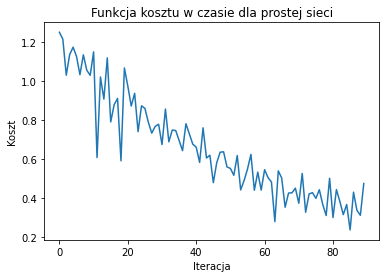

In [ ]:
# Funkcja kosztu w czasie:
plt.plot(losses)
plt.title("Funkcja kosztu w czasie dla prostej sieci")
plt.xlabel("Iteracja")
plt.ylabel("Koszt")

Text(0, 0.5, 'Trafność')

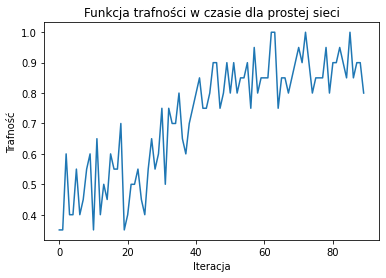

In [ ]:
# Funkcja trafności w czasie:
plt.plot(accuracies)
plt.title("Funkcja trafności w czasie dla prostej sieci")
plt.xlabel("Iteracja")
plt.ylabel("Trafność")

A teraz zrobimy to samo wykorzystując bibliotekę KERAS. Robimy tak:

1. Inicjujemy obiekt klasy sequential - jest to pusty obiekt sieci neuronowej, w której kolejne warstwy są układane jedna po drugiej;
2. Za pomocą metody .add dodajemy kolejne warstwy ukryte i końcową, o liczbie neuronów równej liczbie klas do przewidzenia;
3. W zwykłej sieci klasyfikacyjnej (Multi Layer Perception) podstawę architektury stanowi warstwa typu Dense;
4. W pierwszej warstwie należy wyspecyfikować:
  * input_dim, czyli liczbę atrybutów / cech obiektów (wierszy) danych,
  * liczbę neuronów,
  * funkcję aktywacji dla tej warstwy activation

5. Po zdefiniowaniu sieci kompilujemy ją funkcją compile, w argumentach podając:
  * optymalizator,
  * metryki
  * funkcję kosztu

In [ ]:
# Ta sama sieć neuronowa, stworzona z wykorzystaniem KERAS:

model = tf.keras.models.Sequential()        # Model sekwencyjny
model.add(tf.keras.layers.Dense(units = nh, input_dim = nx, activation = "relu"))  # Dodanie pierwszej warstwy

model.add(tf.keras.layers.Dense(units = no, activation = "softmax"))               # Dodanie drugiej warstwy

print(model.summary())                      # Wypluj wyniki

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Proces szkolenia:
model.compile(optimizer = tf.keras.optimizers.SGD(momentum = 0.9),
              metrics = ["accuracy"],
              loss = "categorical_crossentropy")

history = model.fit(iris_x_trains, iris_y_train, epochs = 15, batch_size = 24) # To jest właściwa funkcja szkoląca:

Epoch 1/15
5/5 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.9500
Epoch 2/15
5/5 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9500
Epoch 3/15
5/5 [==============================] - 0s 2ms/step - loss: 0.2248 - accuracy: 0.9500
Epoch 4/15
5/5 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9583
Epoch 5/15
5/5 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9583
Epoch 6/15
5/5 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9583
Epoch 7/15
5/5 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9500
Epoch 8/15
5/5 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9583
Epoch 9/15
5/5 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9667
Epoch 10/15
5/5 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9750
Epoch 11/15
5/5 [======================

Text(0, 0.5, 'Koszt')

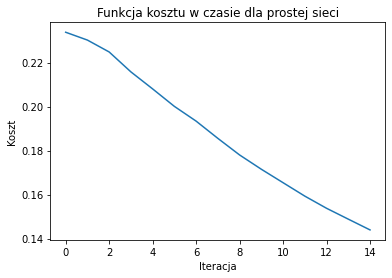

In [ ]:
# Funkcja kosztu w czasie:
plt.plot(history.history["loss"])
plt.title("Funkcja kosztu w czasie dla prostej sieci")
plt.xlabel("Iteracja")
plt.ylabel("Koszt")

Text(0, 0.5, 'Koszt')

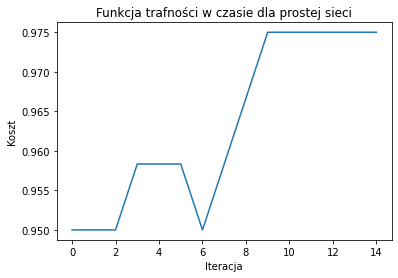

In [ ]:
# Funkcja trafności w czasie:
plt.plot(history.history["accuracy"])
plt.title("Funkcja trafności w czasie dla prostej sieci")
plt.xlabel("Iteracja")
plt.ylabel("Koszt")

Przykład 2 - prognozujemy wartości numeryczne (ceny mieszkań w Bostonie)

Klasyfikacja jest przedstawiana jako klasyczny przykład zastosowania prostych sieci neuronowych. Innym jest regresja, czyli prognozowanie wartości numerycznych. Posłużymy się zbiorem danych Bostn Housing, gdzie na podstawie cech mieszkania będziemy przewidywać jego ceny:

1. Za pomocą pakietu scikit-learn załadujemy dane ze zbioru Boston,
2. Przekonwertujemy je do postaci Data Frame,
3. Przeprowadzimy podział na zbiory testowy i uczący,
4. Przeprowadzimy normalizację.

In [ ]:
# Wczytanie danych i wstępna obróbka:

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_y = pd.DataFrame(boston.target)
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Podział danych na zbiór testowy i uczący:
boston_x_train, boston_x_test, boston_y_train, boston_y_test = train_test_split(boston_df,
                                                                                boston_y,
                                                                                train_size = 0.8,
                                                                                random_state = 123)

boston_x_train.shape, boston_y_train.shape

((404, 13), (404, 1))

In [ ]:
# Normalizacja danych (standaryzacja):
scaler_boston = StandardScaler()
boston_x_trains = scaler_boston.fit_transform(boston_x_train)
boston_x_trains = pd.DataFrame(boston_x_trains, columns = boston_x_train.columns)
boston_x_trains.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.401149,3.653859,-1.226095,-0.245698,-1.199016,2.231987,-1.278274,0.623686,-0.636934,-1.095990,-1.753696,0.388482,-1.266398
1,0.702723,-0.486534,0.995482,-0.245698,1.587329,0.176596,1.008537,-0.806000,1.675027,1.530409,0.808919,0.313998,0.940407
2,-0.389296,-0.486534,-1.028718,-0.245698,-0.391243,-1.008059,0.697674,-0.557330,-0.521336,-0.668160,-0.868429,0.433478,0.261930
3,-0.391244,-0.486534,-1.195840,-0.245698,-0.950404,0.487675,-0.399281,-0.136278,-0.868130,-0.787002,-0.216127,0.008419,-0.867459
4,-0.403599,2.782197,-1.035921,-0.245698,-1.251491,-0.559197,-0.763742,1.654751,-0.752532,0.359819,1.228256,0.433478,0.277382


Wykorzystanie biblioteki do budowy sieci.

Kroki budowy sieci są takie same, jak w przypadku klasyfikacji kwiatów irysa. Jest tylko kilka różnic:

1. W tym przypadku, jako aktywacji ostatniej warstwy używamy ReLU, ponieważ przewidujemy pojedynczą wartość liczbową,
2. Funkcją kosztu będzie Mean Squared Error, czyli średniokwadratowy błąd predykcji cen,
3. Dodamy (jako podgląd) średni bezwzględny błąd procentowy (MAPE), żeby wiedzieć, o ile procent ceny docelowej pomylił się nasz model.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
None


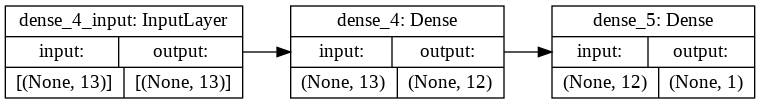

In [ ]:
# Jedziemy z koksem:

nx_boston = boston_x_trains.shape[1]
nh_boston = 12

model_boston = tf.keras.models.Sequential()
model_boston.add(tf.keras.layers.Dense(nh_boston, activation = "relu", input_dim = nx_boston))
model_boston.add(tf.keras.layers.Dense(1, activation = "relu"))

model_boston.compile(loss = tf.keras.losses.MeanSquaredError(),
                     metrics = [tf.keras.losses.MeanSquaredError(name = "MSE"), tf.keras.losses.MeanAbsolutePercentageError(name = "MAPE")],
                     optimizer = tf.keras.optimizers.SGD(momentum = 0.9))

print(model_boston.summary())
tf.keras.utils.plot_model(model_boston,
                          show_shapes = True,
                          show_layer_names = True,
                          rankdir = "LR")

In [ ]:
history_boston = model_boston.fit(boston_x_trains,
                                  boston_y_train,
                                  epochs = 20,
                                  batch_size = 64)

Epoch 1/20
7/7 [==============================] - 0s 3ms/step - loss: 306.3843 - MSE: 302.5524 - MAPE: 71.5115
Epoch 2/20
7/7 [==============================] - 0s 2ms/step - loss: 96.6054 - MSE: 102.2394 - MAPE: 33.2890
Epoch 3/20
7/7 [==============================] - 0s 2ms/step - loss: 47.8578 - MSE: 44.4461 - MAPE: 24.5196
Epoch 4/20
7/7 [==============================] - 0s 2ms/step - loss: 24.4425 - MSE: 22.6710 - MAPE: 17.1669
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 48.9596 - MSE: 57.8604 - MAPE: 24.4630
Epoch 6/20
7/7 [==============================] - 0s 2ms/step - loss: 59.2684 - MSE: 55.8536 - MAPE: 24.9242
Epoch 7/20
7/7 [==============================] - 0s 2ms/step - loss: 32.3463 - MSE: 37.6596 - MAPE: 22.9710
Epoch 8/20
7/7 [==============================] - 0s 2ms/step - loss: 23.6838 - MSE: 24.0156 - MAPE: 19.9049
Epoch 9/20
7/7 [==============================] - 0s 2ms/step - loss: 18.9550 - MSE: 17.9210 - MAPE: 17.9848
Epoch 10/20
7/7 

In [ ]:
# Predykcja na zbiorze testowym:
# Teraz wyuczony model powinien pięknie przewidzieć ceny mieszkań na zbiorze testowym:
boston_x_test_scaled = scaler_boston.transform(boston_x_test)
yhat_boston = model_boston.predict(boston_x_test_scaled).squeeze()
mean_squared_error(boston_y_test, yhat_boston)
tf.keras.metrics.mean_absolute_percentage_error(boston_y_test, yhat_boston).numpy()

array([ 58.017677,  28.853693,  49.13495 ,  31.48722 ,  36.81964 ,
        29.933516,  30.264294, 220.82317 ,  33.326645,  33.600277,
        28.744501,  38.313774,  72.423065,  29.069918,  29.224909,
        36.797436,  28.563318,  46.750202,  33.85401 ,  69.10099 ,
        53.591312,  53.80146 ,  39.68686 ,  49.784203,  53.80146 ,
        30.777777,  58.80185 ,  34.43219 ,  35.07016 ,  37.92857 ,
        28.80719 ,  33.3691  , 111.91991 ,  33.326645,  30.491947,
        32.31665 ,  28.428232,  55.008114,  77.14747 ,  40.161606,
        39.44563 ,  36.797436,  29.651741,  53.80146 ,  63.1262  ,
        29.833103,  33.585327,  30.259388,  53.591312,  58.017677,
        33.831573,  30.999453,  32.362305,  87.79892 ,  36.06308 ,
        58.80185 ,  41.138912, 162.49168 ,  37.44055 , 100.8632  ,
        34.43219 ,  31.907139,  53.591312,  33.585327,  29.125526,
        29.640255,  28.470102,  50.252335,  29.377249,  31.817827,
        32.362305,  28.608057,  47.184563,  28.66556 ,  48.364